<a href="https://colab.research.google.com/github/tuntul17/Others/blob/main/FIZ463E_hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scatter Plot: Plot a HR diagram 



*   Luminosity - temprature relation
> L = 4pi(SB)R^2T^4 

  > where (SB) is Stefan-Boltzmann constant




In [61]:
import pandas as pd 
import numpy as np
import math as mt
from pylab import *
import seaborn as sn
import sklearn as sk
import plotly.express as px

The file hygdata_v3-abridged.csv represents a version of the HYG-database, released under a Creative Commons Attribution-ShareAlike license} which provides data on **119614** stars.

* The luminosity column is identified as 'lum' in the header

* the star temperature can be calculated from its color index also referred to as (B−V) and identified as the column labeled 'ci'.

In [73]:
df = pd.read_csv('hygdata_v3-abridged.csv')
df.head()

,Unnamed: 0,id,hip,hd,hr,gl,bf,proper,ra,dec,...,flam,con,comp,comp_primary,base,lum,var,var_min,var_max,T
0,76189,76189,76423.0,139216.0,NaN,NaN,NaN,NaN,15.607830,15.101424,...,17.0,Ser,1,76189,NaN,91.790979,Tau-4,6.760,6.410,4308.727009
1,107312,107312,107655.0,207372.0,NaN,NaN,NaN,NaN,21.806345,0.200786,...,NaN,Aqr,1,107312,NaN,14.736692,NaN,NaN,NaN,5039.699311
2,62985,62985,63187.0,NaN,NaN,NaN,NaN,NaN,12.945114,-50.182346,...,NaN,Cen,1,62985,NaN,2.412126,NaN,10.437,10.287,5426.533872
3,114671,114671,115032.0,219713.0,NaN,NaN,NaN,NaN,23.298389,18.702398,...,NaN,Peg,1,114671,NaN,23.507151,NaN,NaN,NaN,4565.156303
4,51601,51601,51750.0,91426.0,NaN,NaN,NaN,NaN,10.572482,49.107306,...,NaN,UMa,1,51601,NaN,173.300574,NaN,NaN,NaN,3870.295640


* To find the surface temprature we need to use Ballesteros formula
> T = 4600ˣ(1/0.92(B-V)+1.7)+1/(0.92(B-V)+0.62))


In [63]:
df['T'] = 4600*(1/(0.92*df['ci']+1.7)+1/(0.92*df['ci']+0.62))

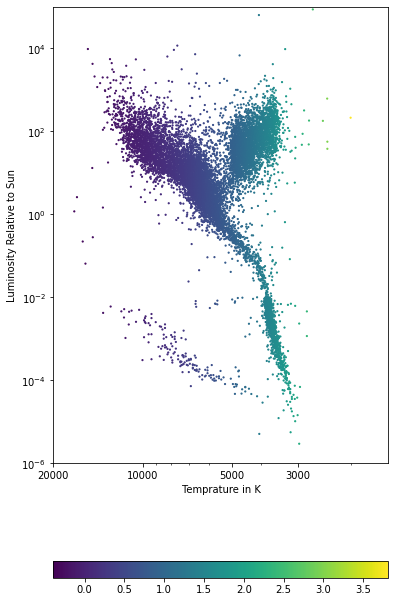

In [74]:

Rat = 100
w,h =600,1200
f,ax = subplots(figsize=(w/Rat,h/Rat))

color = df['ci']
points = ax.scatter(df['T'],df['lum'],s= 1.4,c = color)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(20000,1500)
ax.set_ylim(10**-6,10**5)
ax.set_xticks([20000, 10000, 5000, 3000])
ax.get_xaxis().set_major_formatter(ScalarFormatter()) 

xlabel(' Temprature in K')
ylabel('Luminosity Relative to Sun')

f.colorbar(points,ax = ax,orientation="horizontal")